# Importing functions and loading the data set

In [96]:
import numpy as np
import os
import cv2
import sys
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [97]:
def load_images_from_folder(folder):
    images = []
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    
    return images

path = "data/sample_dataset/"
images = load_images_from_folder(path)

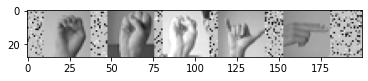

In [98]:
plt.imshow(images[0], cmap="gray")
plt.show()

In [99]:
np.set_printoptions(threshold=sys.maxsize)
print(images[0])

[[200 200 200 200 108 200 186 200 200 200 179 181 181 179 178 177 177 178
  176 175 175 174 174 172 171 170 168 167 166 166 163 163 163 161 160 159
  158 158 200 200 200 200 200 214 200 200 235 200 105 107 109 113 118 121
  125 128 129 131 134 135 137 136 139 139 143 169 149 123 121 147 141 142
  142 143 141 140 105  89 200 197  43 220 219 221 219 220 221 221 220 220
  219 219 219 218 218 216 216 216 216 214 214 213 210 209 119  67  70  47
   47  34 200 200 200 200 127 133 135 137 142 147 152 155 159 161 163 166
  168 170 170 171 172 172 172 173 172 172 172 172 171 171 169 168 200 210
  200  81 225 200 200 200 157 111 200 137 139 141 142 144 146 147 149 150
  151 152 153 155 156 156 158 159 159 160 160 162 162 162 162 163 163 162
  162   2 200 200 200 200 200 200 200 200 131 200 214  44 200 152 200  97
  200  21]
 [131 200  72 195 200  73 200 200 146  65 179 181 181 179 179 179 178 178
  178 176 177 175 175 175 173 172 170 168 167 167 167 166 165 163 161 159
  158 158 200 173 200 223 2

# Edge detection test

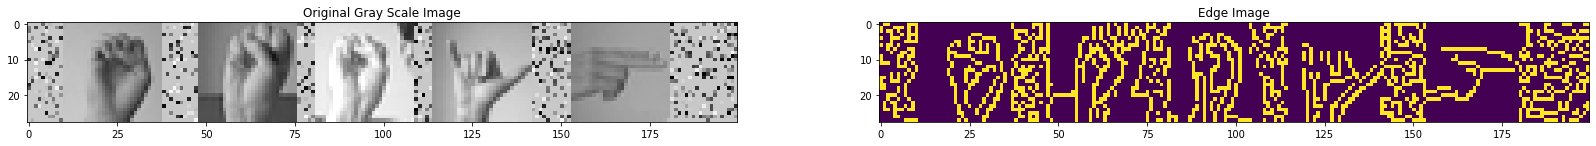

In [100]:
# Declaring the output graph's size
plt.figure(figsize=(28, 28))

# Convert image to grayscale
img_gs = images[0]

# Apply canny edge detector algorithm on the image to find edges
edges = cv2.Canny(img_gs, 100,200)

# Plot the original image against the edges
plt.subplot(121), plt.imshow(img_gs, cmap="gray")
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')

# Display the two images
plt.show()

In [101]:
for i, val in enumerate(edges[0]):
    if i < 191:
        print(i, edges[0][i], edges[0][i+1], edges[0][i+2], edges[0][i+3], edges[0][i+4], edges[0][i+5], 
             edges[0][i+6], edges[0][i+7], edges[0][i+8], edges[0][i+9], )

0 0 255 255 0 0 0 0 0 255 255
1 255 255 0 0 0 0 0 255 255 255
2 255 0 0 0 0 0 255 255 255 0
3 0 0 0 0 0 255 255 255 0 0
4 0 0 0 0 255 255 255 0 0 0
5 0 0 0 255 255 255 0 0 0 0
6 0 0 255 255 255 0 0 0 0 0
7 0 255 255 255 0 0 0 0 0 0
8 255 255 255 0 0 0 0 0 0 0
9 255 255 0 0 0 0 0 0 0 0
10 255 0 0 0 0 0 0 0 0 0
11 0 0 0 0 0 0 0 0 0 0
12 0 0 0 0 0 0 0 0 0 0
13 0 0 0 0 0 0 0 0 0 0
14 0 0 0 0 0 0 0 0 0 0
15 0 0 0 0 0 0 0 0 0 0
16 0 0 0 0 0 0 0 0 0 0
17 0 0 0 0 0 0 0 0 0 0
18 0 0 0 0 0 0 0 0 0 0
19 0 0 0 0 0 0 0 0 0 0
20 0 0 0 0 0 0 0 0 0 0
21 0 0 0 0 0 0 0 0 0 0
22 0 0 0 0 0 0 0 0 0 0
23 0 0 0 0 0 0 0 0 0 0
24 0 0 0 0 0 0 0 0 0 0
25 0 0 0 0 0 0 0 0 0 0
26 0 0 0 0 0 0 0 0 0 0
27 0 0 0 0 0 0 0 0 0 0
28 0 0 0 0 0 0 0 0 0 255
29 0 0 0 0 0 0 0 0 255 0
30 0 0 0 0 0 0 0 255 0 0
31 0 0 0 0 0 0 255 0 0 0
32 0 0 0 0 0 255 0 0 0 0
33 0 0 0 0 255 0 0 0 0 0
34 0 0 0 255 0 0 0 0 0 255
35 0 0 255 0 0 0 0 0 255 255
36 0 255 0 0 0 0 0 255 255 255
37 255 0 0 0 0 0 255 255 255 0
38 0 0 0 0 0 255 255 255 0 255

# Writing a function to find the top-left corner of each hand based on edge detection

In [102]:
def hand_finder(images):
    result = []
    
    if len(images) != 28:
        for image in images:    
            img_result = []
            
            edged_image = cv2.Canny(image, 100, 200)

            i = 0

            while i < 191:
                if edged_image[0][i] + edged_image[0][i+1] + edged_image[0][i+2] + edged_image[0][i+3] + \
                edged_image[0][i+4] + edged_image[0][i+5] + edged_image[0][i+6] + edged_image[0][i+7] + \
                edged_image[0][i+8] + edged_image[0][i+9] == 0:
                    img_result.append(i)
                    i += 27
                i += 1
            
            result.append(img_result)

    else:
        edged_image = cv2.Canny(images, 100,200)

        i = 0

        while i < 191:
            if edged_image[0][i] + edged_image[0][i+1] + edged_image[0][i+2] + edged_image[0][i+3] + \
            edged_image[0][i+4] + edged_image[0][i+5] + edged_image[0][i+6] + edged_image[0][i+7] + \
            edged_image[0][i+8] + edged_image[0][i+9] == 0:
                result.append(i)
                i += 27
            i += 1

    return result
    
hands_found = hand_finder(images)

<ipython-input-102-bc94ab55ece2>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  if edged_image[0][i] + edged_image[0][i+1] + edged_image[0][i+2] + edged_image[0][i+3] + \


In [103]:
print(hands_found)

[[11, 48, 82, 115, 154], [19, 102, 130, 158], [46, 115, 151], [10, 80, 112], [17, 49, 87, 123, 158], [11, 49, 86, 119, 158], [45, 81, 123, 152], [128, 157], [10, 52, 118], [18, 52, 85, 118, 159], [14, 92, 125, 162], [12, 56, 120, 160], [13, 58, 116], [8, 50, 121], [87, 121], [7, 84, 113], [11, 45, 116, 152], [11, 57, 119, 154], [17, 87, 132, 161], [17, 58, 120, 160], [46, 88, 133, 161], [12, 46, 79, 117, 154], [9, 42, 81, 115, 150], [5, 41, 78, 113], [18, 86, 118, 160]]


# Writing a function to extract all values corresponding to each hand in every image

In [104]:
def hand_locator(images, hands):
    all_img = []

    for idx, val in enumerate(hands):
        img = []

        for j in val:
            hand = images[idx][:28, j-1:j+27]
            img.append(hand)

        all_img.append(img)
    
    return all_img

all_img = hand_locator(images, hands_found)


# Loading a training data set and training a random forest to create a prediction for all images

In [105]:
def load_data():
    with np.load("data/train_data_label.npz") as data:
        train_data = data["train_data"]
        train_label = data["train_label"]
    
    with np.load("data/test_data_label.npz") as data:
        test_data = data["test_data"]
        test_label = data["test_label"]

    return train_data, train_label, test_data, test_label

X_train, y_train, X_test, y_test = load_data()

In [106]:
rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)

print(rf.score(X_train, y_train))

y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0
0.8070273284997211


# Writing a function that makes 5 predictions for each image


In [107]:
def predict(images):
    predictions = []
    
    for image in images:
        img_pred = []
        
        for i in range(5):
            hand_pred = []
            
            for hand in image:
                if hand.shape[1] != 28:
                    break
                else:
                    pred = rf.predict(hand.reshape(1,784))
                    hand_pred.append(str(pred[0]))
            
            for i in range(len(hand_pred)):
                hand_pred[i] = hand_pred[i].zfill(2)
                
            hand_pred = "".join(hand_pred)
                
            img_pred.append(hand_pred)
    
        predictions.append(img_pred)
    
    return predictions                
        
all_predictions = predict(all_img)

# Saving the actual labels of each image to a list

In [108]:
def load_true_labels(folder):
    labels = []
    
    for file in os.listdir(folder):
        labels.append(file.split(".")[0])
        
    return labels

path = "data/sample_dataset/"
true_labels = load_true_labels(path)

In [109]:
print(true_labels)

['0418182407', '152202', '151124', '180019', '1305181420', '08200705', '24131115', '2406', '170204', '0008240417', '08232304', '10081706', '021514', '231807', '0219', '070018', '08000513', '18010222', '19221623', '24220520', '19181012', '2423142413', '0114032020', '06160712', '21230615']


# Checking the predictions agains the true labels and calculating accuracy

In [110]:
correct = 0
incorrect = 0

for idx, val in enumerate(true_labels):
    for i in all_predictions[idx]:
        if i == val:
            correct += 1
        else:
            incorrect += 1
        break

In [111]:
print(f"Number correct: {correct}. \nNumber incorrect: {incorrect}. \nAccuracy: {correct/(correct+incorrect)}")


Number correct: 11. 
Number incorrect: 14. 
Accuracy: 0.44


# Showing each hand according to the functions

0


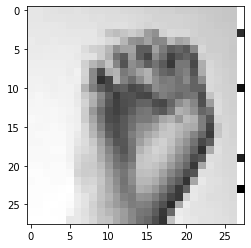

0


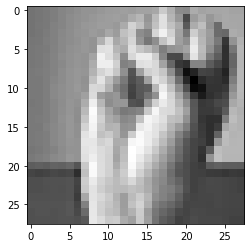

0


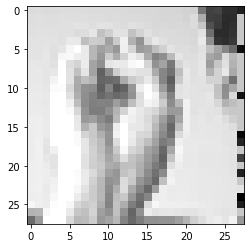

0


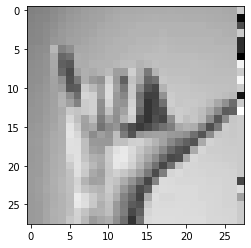

0


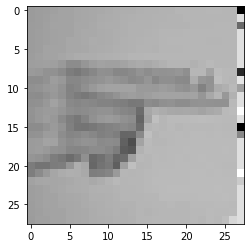

1


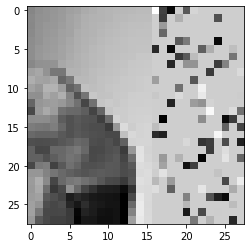

1


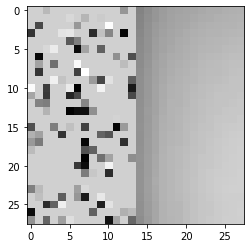

1


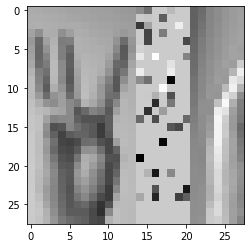

1


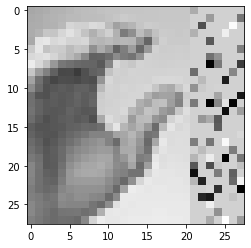

2


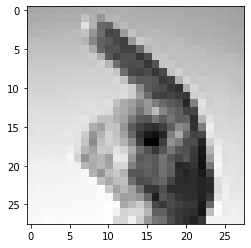

2


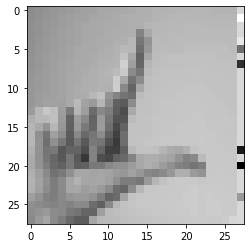

2


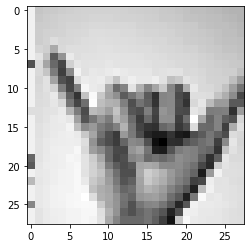

3


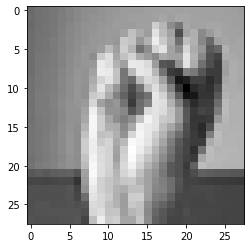

3


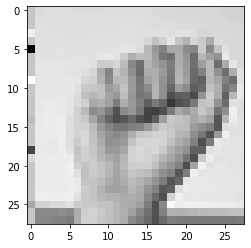

3


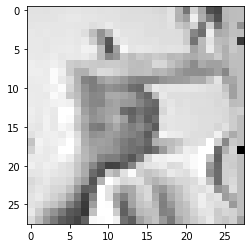

4


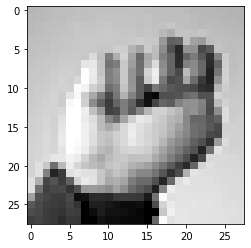

4


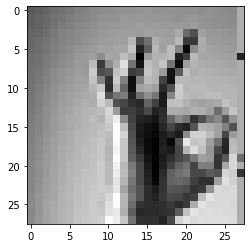

4


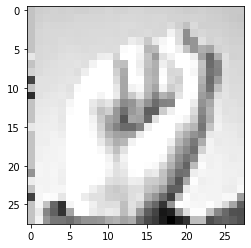

4


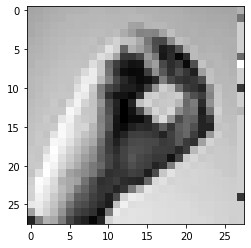

4


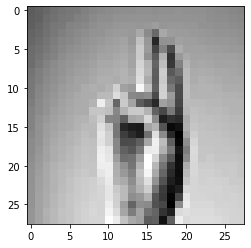

5


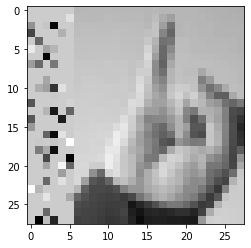

5


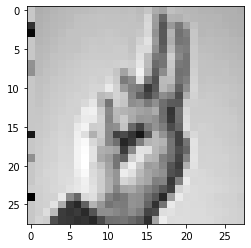

5


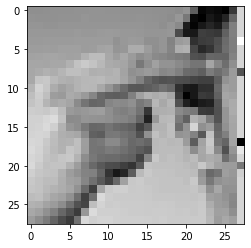

5


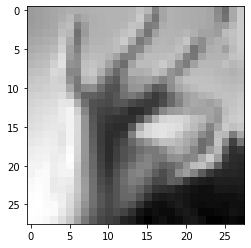

5


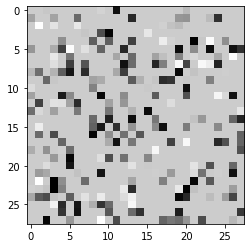

6


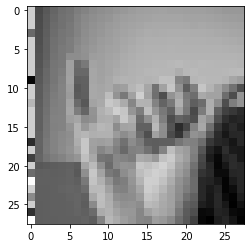

6


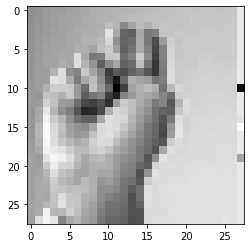

6


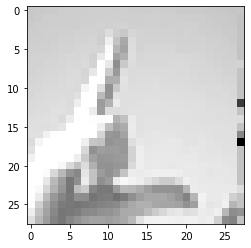

6


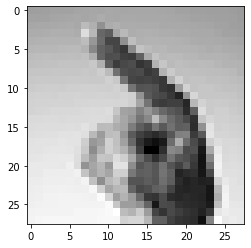

7


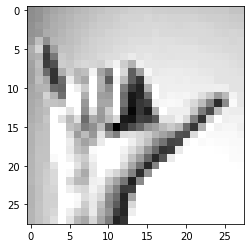

7


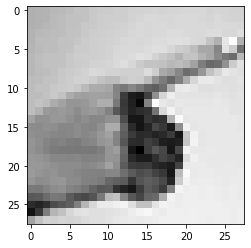

8


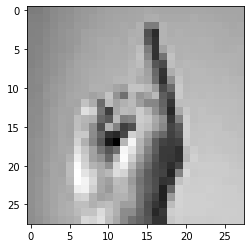

8


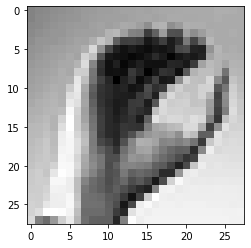

8


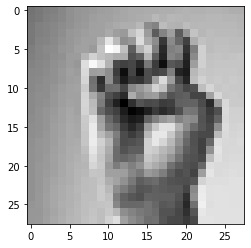

9


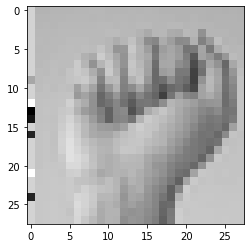

9


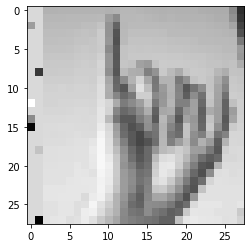

9


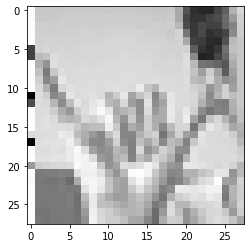

9


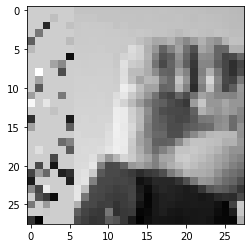

9


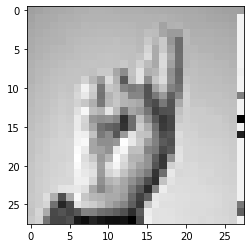

10


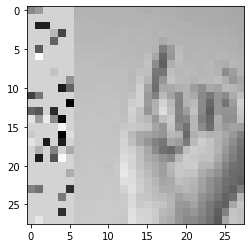

10


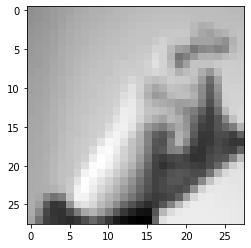

10


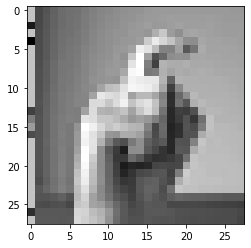

10


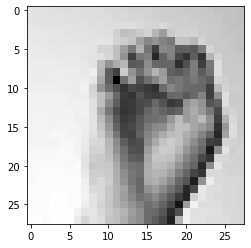

11


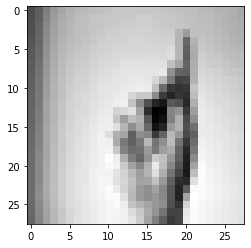

11


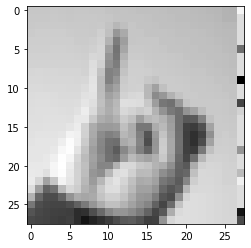

11


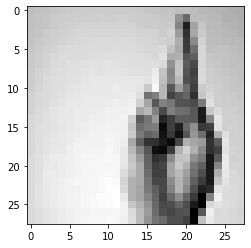

11


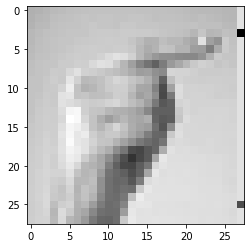

12


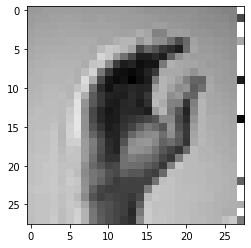

12


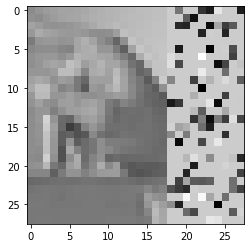

12


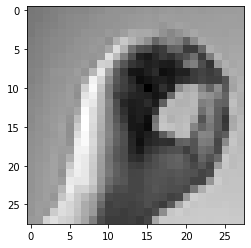

13


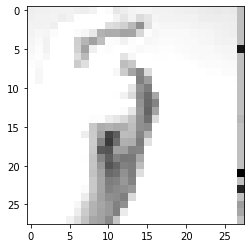

13


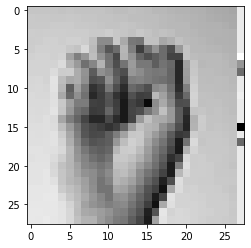

13


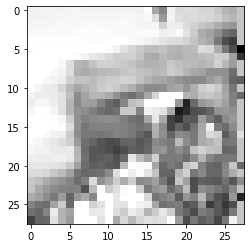

14


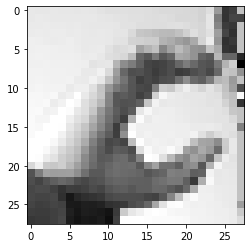

14


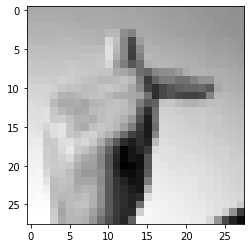

15


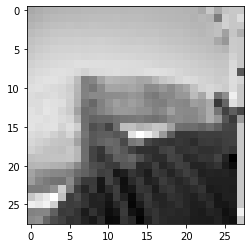

15


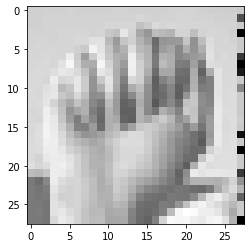

15


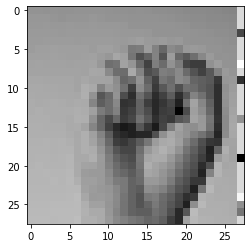

16


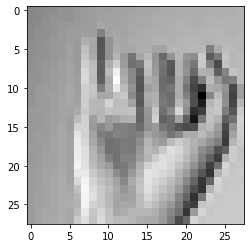

16


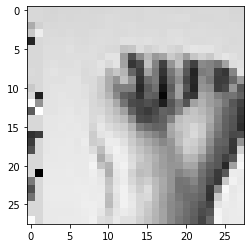

16


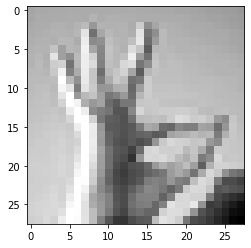

16


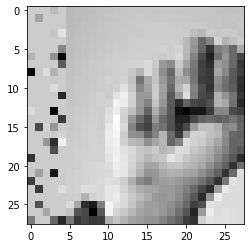

17


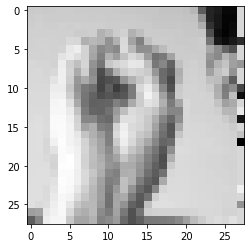

17


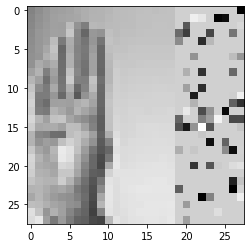

17


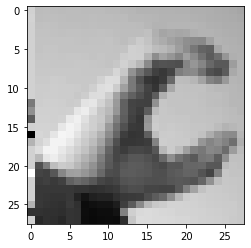

17


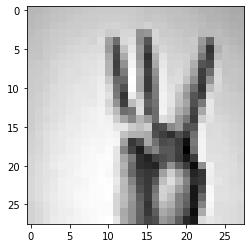

18


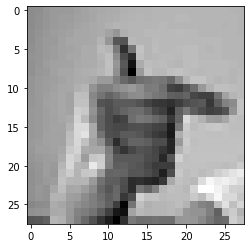

18


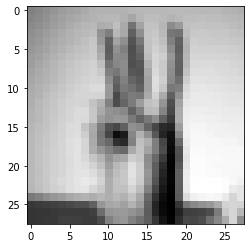

18


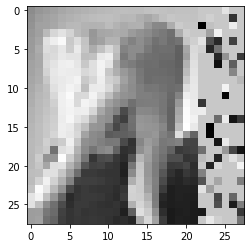

18


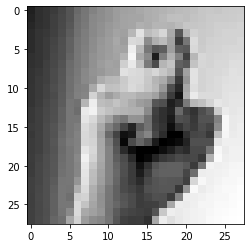

19


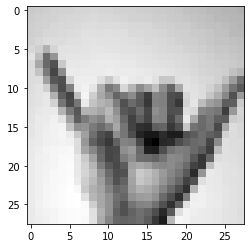

19


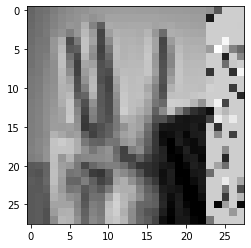

19


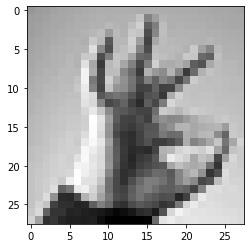

19


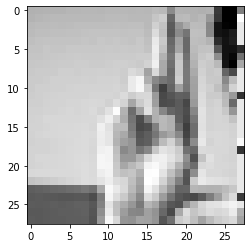

20


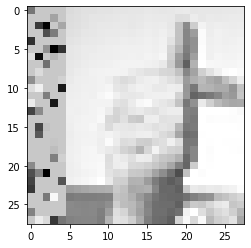

20


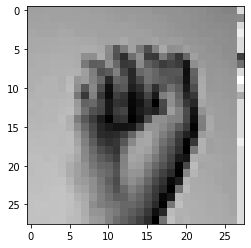

20


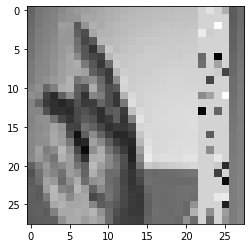

20


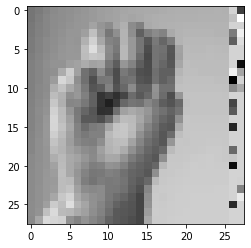

21


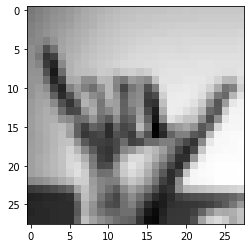

21


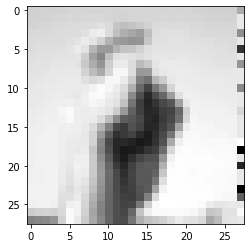

21


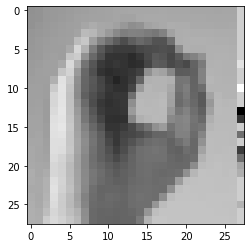

21


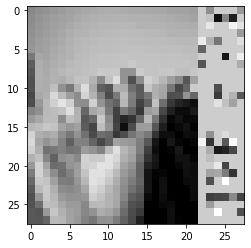

21


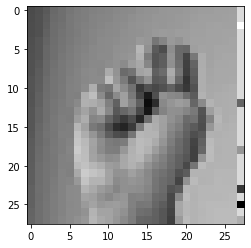

22


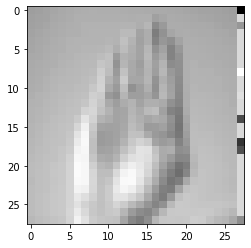

22


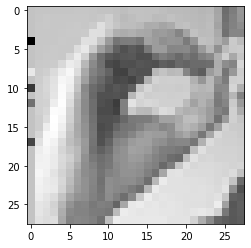

22


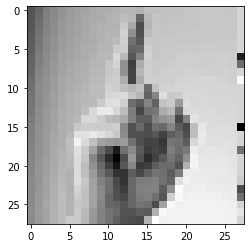

22


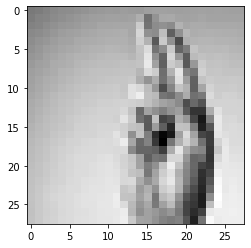

22


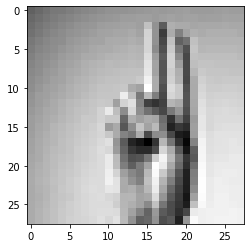

23


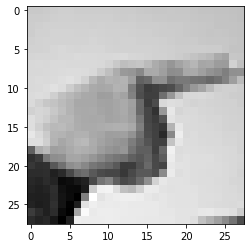

23


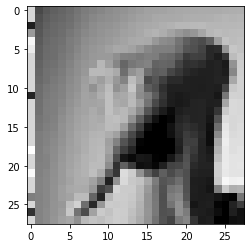

23


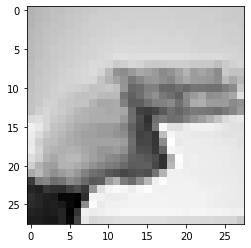

23


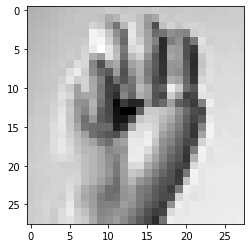

24


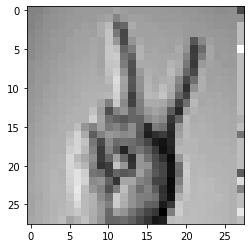

24


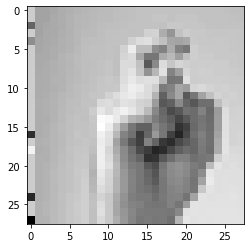

24


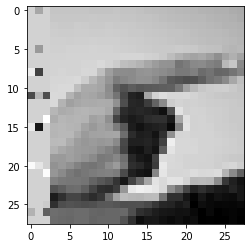

24


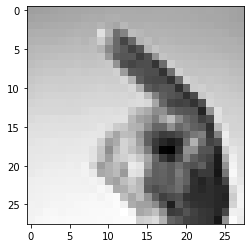

In [20]:
for idx, val in enumerate(hands_found):
    for j in val:
        print(idx)
        plt.imshow(images[idx][:28, j:j+28], cmap="gray")
        plt.show()

# Making predictions for al 10,000 images in the full data set

In [71]:
dataset = np.load("data/test_images_task2.npy")
dataset = dataset.astype('uint8')
print(dataset.shape)

(10000, 28, 200)


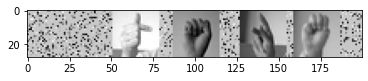

In [72]:
plt.imshow(dataset[0], cmap="gray")
plt.show()

In [73]:
hands_found_dataset = hand_finder(dataset)
all_img_dataset = hand_locator(dataset, hands_found_dataset)

<ipython-input-31-bc94ab55ece2>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  if edged_image[0][i] + edged_image[0][i+1] + edged_image[0][i+2] + edged_image[0][i+3] + \


In [90]:
dataset_preds = predict(all_img_dataset)

In [93]:
print(dataset_preds[0:5])

[['17180512', '17180512', '17180512', '17180512', '17180512'], ['2423141713', '2423141713', '2423141713', '2423141713', '2423141713'], ['03171006', '03171006', '03171006', '03171006', '03171006'], ['1019040819', '1019040819', '1019040819', '1019040819', '1019040819'], ['200114', '200114', '200114', '200114', '200114']]


In [94]:
print(len(dataset_preds))

10000
